In [451]:
import numpy as np

In [452]:
file = ('train2s.csv')

In [453]:
raw_data = open(file, 'rt')

In [454]:
data = np.loadtxt(raw_data, delimiter=",")

In [455]:
data

array([[  3.    ,   1.    ,  22.    , ...,   7.25  ,   1.    ,   0.    ],
       [  1.    ,   2.    ,  38.    , ...,  71.2833,   2.    ,   1.    ],
       [  3.    ,   2.    ,  26.    , ...,   7.925 ,   1.    ,   1.    ],
       ..., 
       [  3.    ,   2.    ,   0.    , ...,  23.45  ,   1.    ,   0.    ],
       [  1.    ,   1.    ,  26.    , ...,  30.    ,   2.    ,   1.    ],
       [  3.    ,   1.    ,  32.    , ...,   7.75  ,   3.    ,   0.    ]])

In [456]:
data.shape

(891, 8)

In [457]:
X = data[:,0:7].T

In [458]:
X

array([[  3.    ,   1.    ,   3.    , ...,   3.    ,   1.    ,   3.    ],
       [  1.    ,   2.    ,   2.    , ...,   2.    ,   1.    ,   1.    ],
       [ 22.    ,  38.    ,  26.    , ...,   0.    ,  26.    ,  32.    ],
       ..., 
       [  0.    ,   0.    ,   0.    , ...,   2.    ,   0.    ,   0.    ],
       [  7.25  ,  71.2833,   7.925 , ...,  23.45  ,  30.    ,   7.75  ],
       [  1.    ,   2.    ,   1.    , ...,   1.    ,   2.    ,   3.    ]])

In [459]:
Y = data[:,7:8]

In [460]:
Y.shape

(891, 1)

In [461]:
X.shape

(7, 891)

In [462]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

In [463]:
sigmoid(np.array([1,2,3,4]))

array([ 0.73105858,  0.88079708,  0.95257413,  0.98201379])

In [464]:
def Initialize(X):
    n = X.shape[0]
    W = np.zeros([n,1])
    b = 0
    return W,b

In [465]:
W,b = Initialize(X)

In [466]:
W

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [467]:
b

0

In [468]:
def forward(X,W,b):
    z = (W.T).dot(X)+b
    Y = sigmoid(z.T)
    return Y

In [469]:
Yhat = forward(X,W,b)

In [470]:
def computeCost(X,Yhat,Y):
    m = X.shape[1]
    J = -np.sum(Y*(np.log(Yhat))+(1-Y)*(np.log(1-Yhat)))/m
    return J

In [471]:
cost = computeCost(X,Yhat,Y)
cost

0.69314718055994529

In [472]:
def derivative(X,Yhat,Y):
    m = X.shape[1]
    dW = X.dot(Yhat-Y)/m
    db = np.sum(Yhat-Y)/m
    return dW,db

In [473]:
dW,db = derivative(X,Yhat,Y)
dW,db

(array([[ 0.40572391],
        [ 0.0308642 ],
        [ 2.67442761],
        [ 0.07968575],
        [ 0.01234568],
        [-2.47391105],
        [ 0.12289562]]), 0.11616161616161616)

In [474]:
def update(W,b,dW,db,alpha):
    W = W - alpha*dW
    b = b - alpha*db
    return W,b

In [475]:
w1,b1 = update(W,b,dW,db,.01)
w1,b1

(array([[-0.00405724],
        [-0.00030864],
        [-0.02674428],
        [-0.00079686],
        [-0.00012346],
        [ 0.02473911],
        [-0.00122896]]), -0.0011616161616161617)

In [476]:
def gradient_descent(X,Y,W,b,nIter,alpha):
    cost=[]
    iter1 = []
    arrb = []
    for i in range(0,nIter):
        Yhat = forward(X,W,b)
        iter1.append(i)
        cost.append(computeCost(X,Yhat,Y))
        dW,db = derivative(X,Yhat,Y)
        W,b = update(W,b,dW,db,alpha)
        arrb.append(db)
    return W,b,cost,iter1,arrb

In [477]:
W,b,cost,iter1,arrb = gradient_descent(X,Y,W,b,20000,0.004)

In [478]:
import matplotlib.pyplot as plt


In [479]:
plt.scatter(iter1,cost)

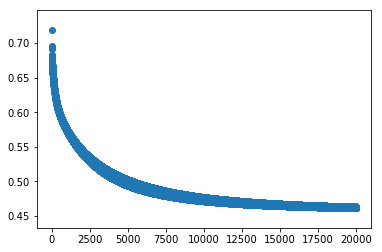

In [480]:
plt.show()

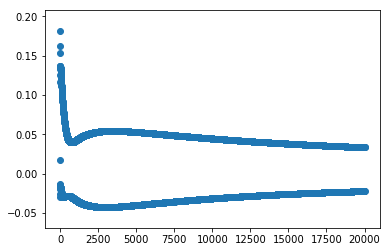

In [481]:
plt.scatter(iter1,arrb)
plt.show()

In [482]:
W,b

(array([[-1.1636488 ],
        [ 2.37887199],
        [-0.02526453],
        [-0.28339753],
        [ 0.0138483 ],
        [-0.0026516 ],
        [ 0.04443706]]), -0.54466501530877665)

In [483]:
cost[0]

0.69314718055994529

In [484]:
arrb[-1]

0.033693909316261698

In [485]:
cost[-1]

0.46367979802233417

In [486]:
def predict(X,W,b):
    m = X.shape[1]
    Yhat = forward(X,W,b)
    for i in range(0,m):
        if Yhat[i]>.5:
            Yhat[i] = 1
        else:
            Yhat[i] = 0
    return Yhat


In [487]:
def accuracy(Y,Yhat):
    A = Yhat-Y
    m = A.shape[0]
    count=0
    for i in range(0,m):
        if A[i] == 0:
            count = count+1
            
    return (count/m)*100

In [488]:
Yhat=predict(X,W,b)

In [489]:
p = accuracy(Y,Yhat)
p

81.3692480359147

In [490]:
file1 = ('test.csv')

In [491]:
raw_data1 = open(file1,'rt')

In [492]:
data1 = np.loadtxt(raw_data1,delimiter=",")

In [493]:
raw_data1

<_io.TextIOWrapper name='test.csv' mode='rt' encoding='UTF-8'>

In [494]:
file1

'test.csv'

In [495]:
Xtest = data1.T

In [496]:
Ytest = predict(Xtest,W,b)

In [497]:
import csv

In [498]:
b1 = open('submission.csv','wb')

In [499]:
a = csv.writer(b1)

In [500]:
Ytest.shape

(418, 1)

In [501]:
YT = Ytest.T

In [502]:
YT.shape

(1, 418)

In [503]:
b1.close()